In [1]:
# Imports 
import pandas as pd
from datetime import datetime
import ast
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from scipy import stats

initial_directory = os.getcwd()
os.chdir(os.path.join(initial_directory, 'src/utils'))
from Cleaning import GetCleanedData

#for LDA:
import gzip
import tarfile
import xml.etree.ElementTree as ET
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Data cleaning

### 1st dataset
After some data exploration we decided to clean the data. 
- Rows with missing Movie country, languages or genres were dropped
- Only the year of the movie release date was kept
- Only the first genre of a movie was kept

We saw that when we clean the rows that do not contain values of box office revenue the dataset is seriously reduced. Our idea was to keep a version of the dataset without taking care of the box office revenue when it is not the target of the analysis. We notice that the size difference between  df_date_revenue_clean and df_date_revenue_runtime_clean is negligeable, no need to treat them separately.

In [2]:
# Importing data
os.chdir(initial_directory)
PATH = 'data'
header = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 
          'Movie languages', 'Movie country', 'Movie genres']
df = pd.read_csv(PATH + '/movie.metadata.tsv', sep='\t', names=header, skipinitialspace=True)

In [3]:
print("Data set initial size = ", df.size)
print("Number of NaN values for each columns:")
if df.isnull().values.any():
    print(df.isnull().sum())

Data set initial size =  735669
Number of NaN values for each columns:
Wikipedia movie ID              0
Freebase movie ID               0
Movie name                      0
Movie release date           6902
Movie box office revenue    73340
Movie runtime               20450
Movie languages                 0
Movie country                   0
Movie genres                    0
dtype: int64


In [4]:
df_date_clean, df_date_revenue_clean, df_date_revenue_runtime_clean = GetCleanedData(df)

print('Size of the data with the dates cleaned up : ', df_date_clean.size)
print('Size of the data with the dates and the box office revenues cleaned up : ', df_date_revenue_clean.size)
print('Size of the data with the dates, the box office revenues and the runtimes cleaned up : ', df_date_revenue_runtime_clean.size)

Size of the data with the dates cleaned up :  555498
Size of the data with the dates and the box office revenues cleaned up :  72198
Size of the data with the dates, the box office revenues and the runtimes cleaned up :  71829


In [5]:
# Storage of clean df in data folder

DATA_PATH = 'data'
os.makedirs(DATA_PATH, exist_ok=True)  # Creation of data folder if it does not exist

df_date_clean.to_csv(DATA_PATH + '/df_date_clean.csv', index=False)
df_date_revenue_clean.to_csv(DATA_PATH + '/df_date_revenue_clean.csv', index=False)
df_date_revenue_runtime_clean.to_csv(DATA_PATH + '/df_date_revenue_runtime_clean.csv', index=False)


In [6]:
df_date_revenue_runtime_clean.sample(5)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie country,Movie genres
25571,97646,/m/0p3_y,Die Hard,1988,140767956.0,132.0,"[Italian Language, German Language, English La...",United States of America,Crime Fiction
28546,32789431,/m/0bbtwng,The Color of Lies,1999,111143.0,111.0,[French Language],France,Crime Fiction
32475,237134,/m/01jf9c,"Paris, Texas",1984,2181987.0,145.0,[English Language],France,Mystery
43023,31790857,/m/0gttw8n,In the Land of Blood and Honey,2011,303877.0,126.0,"[Serbo-Croatian, Bosnian language, English Lan...",United States of America,Romantic drama
12624,887135,/m/03lvwp,The Portrait of a Lady,1996,3692836.0,144.0,"[Italian Language, English Language]",United States of America,Period piece


### 2nd dataset

No particular cleaning.

For now we did not use much of features in this dataframe, maybe in Milestone 3 we will use it and improve cleaning of this dataframe.

In [7]:
header2 = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date','Character Name', 'Actor DOB', 'Actor gender',
           'Actor height', 'Actor ethnicity', 'Actor name', 'Actor age at movie release', 'Freebase character map']
df2 = pd.read_csv(PATH + '/character.metadata.tsv', sep='\t', index_col=False, names=header2, skipinitialspace=True, usecols=range(len(header2)))

In [8]:
df2.head(5)

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character Name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,Freebase character map
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r


In [9]:
if df2.isnull().values.any():
    print(df2.isnull().sum())

Wikipedia movie ID                 0
Freebase movie ID                  0
Movie release date              9995
Character Name                257875
Actor DOB                     106145
Actor gender                   45609
Actor height                  295845
Actor ethnicity               344611
Actor name                      1228
Actor age at movie release    158113
Freebase character map             0
dtype: int64


### Merged dataset

We decided to merge both dataset into one dataframe. 

We previously cleaned both dataframe as needed so no further cleaning in this step, just merging and checking everything is as expected.

In [10]:
merged_df = pd.merge(df_date_clean, df2, on='Wikipedia movie ID', how='inner')

merged_df = merged_df.drop(columns=['Freebase movie ID_y', 'Movie release date_y'])

merged_df = merged_df.rename(columns={'Freebase movie ID_x': 'Freebase movie ID', 
                                      'Movie release date_x': 'Movie release date'})


In [11]:
if merged_df.isnull().values.any():
    print(merged_df.isnull().sum())

Wikipedia movie ID                 0
Freebase movie ID                  0
Movie name                         0
Movie release date                 0
Movie box office revenue      304688
Movie runtime                  34286
Movie languages                    0
Movie country                      0
Movie genres                       0
Character Name                220899
Actor DOB                      97401
Actor gender                   41620
Actor height                  264350
Actor ethnicity               309417
Actor name                      1100
Actor age at movie release    135626
Freebase character map             0
dtype: int64


In [12]:
# Check if there is duplicated row after the merge

merged_df_str = merged_df.applymap(lambda x: str(x) if isinstance(x, list) else x)
duplicate_count = merged_df_str.duplicated().sum()

print("Number of duplicated rows:", duplicate_count)

/var/folders/_p/nx4vm0x94g52cgnydl3lw1x00000gn/T/ipykernel_82771/10596965.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_df_str = merged_df.applymap(lambda x: str(x) if isinstance(x, list) else x)


Number of duplicated rows: 0


In [13]:
# Check bound of date for the merged_df

min_date = merged_df['Movie release date'].min()
max_date = merged_df['Movie release date'].max()

print("Minimum date of merged_df : ", min_date)
print("Maximum fate of merged_df : ", max_date)

Minimum date of merged_df :  1888
Maximum fate of merged_df :  2015


In [14]:
merged_df.head(5)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie country,Movie genres,Character Name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,Freebase character map
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],United States of America,Thriller,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw
1,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],United States of America,Thriller,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m
2,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],United States of America,Thriller,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g
3,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],United States of America,Thriller,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6
4,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],United States of America,Thriller,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r


In [15]:
merged_df.to_csv(DATA_PATH + '/merged_df.csv', index=False)

### GDP dataset

We created this dataset of GDP specifically for our project, so it is already tailored to our requirements and does not require any additional cleaning.

In [16]:
df_gdp = pd.read_csv(PATH + '/GDP.csv', sep=';',)
df_gdp = df_gdp.rename(columns={"Country": "Movie country"})

In [17]:
# Save in data folder
df_gdp.to_csv(DATA_PATH + '/df_gdp.csv', index=False)

# Data Analysis

### 1) Dataset Exploration

In [18]:
df_date_clean.describe()

,Wikipedia movie ID,Movie box office revenue,Movie runtime
count,6.172200e+04,8.022000e+03,5.088300e+04
mean,1.539422e+07,4.964957e+07,1.161860e+02
std,1.067139e+07,1.141114e+08,4.784624e+03
min,3.300000e+02,1.000000e+04,0.000000e+00
25%,5.698308e+06,2.248500e+06,8.300000e+01
50%,1.399151e+07,1.144700e+07,9.400000e+01
75%,2.405099e+07,4.304377e+07,1.070000e+02
max,3.750192e+07,2.782275e+09,1.079281e+06


In the first part of this analysis, we focus on the first 18 countries which produce the more movies

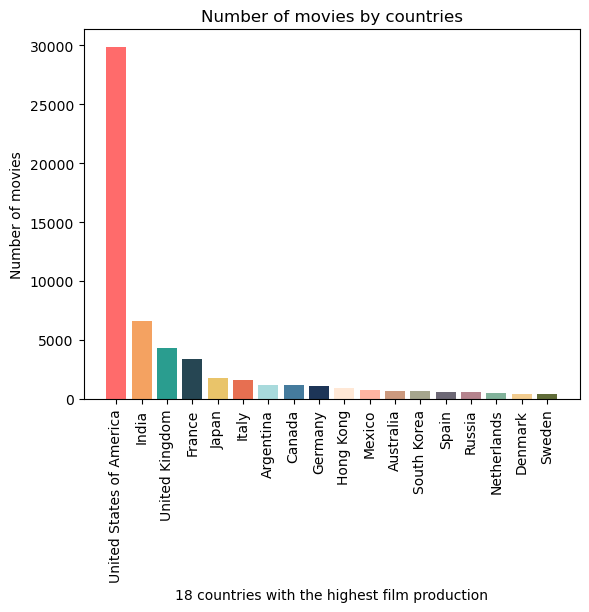

In [19]:
countries = df_date_clean.groupby(['Movie country']).count()['Wikipedia movie ID']

countries['Russia'] = countries['Russia'] + countries['Soviet Union']
countries['Germany'] = countries['Germany'] + countries['German Democratic Republic'] + countries['West Germany']
countries = countries.drop('Soviet Union')
countries = countries.nlargest(18)
countries_names = countries.index.to_list()

colors = [
    "#FF6B6B", "#F4A261", "#2A9D8F", "#264653", "#E9C46A", "#E76F51", "#A8DADC", "#457B9D", "#1D3557", "#FFE8D6", 
    "#FFB4A2",  
    "#CB997E",  
    "#A5A58D",  
    "#6D6875",  
    "#B5838D",  
    "#81B29A",  
    "#F2CC8F",  
    "#606C38" 
]


plt.bar(countries_names,countries,width=0.8, color = colors)
plt.xticks(rotation=90)
plt.xlabel('18 countries with the highest film production')
plt.ylabel('Number of movies')
plt.title('Number of movies by countries')
plt.show()

This barplot shows the main global movies producer is the USA. Their industry is really developped compared to the rest of the world. There are producing at least 4 times more movies than the second biggest producer which is India.

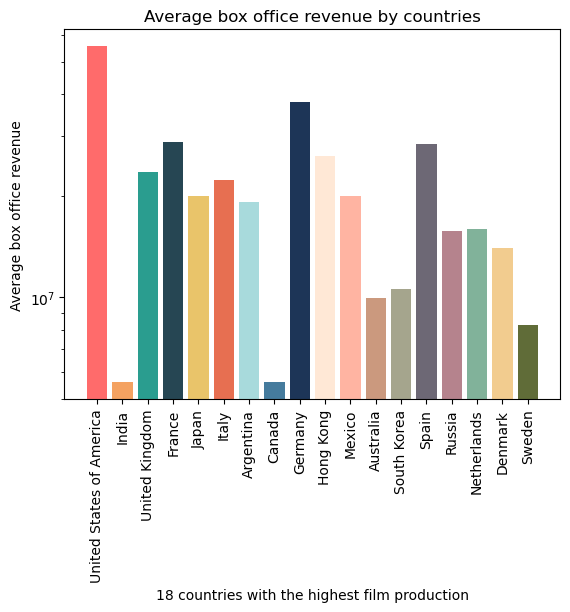

In [20]:
countries_revenues = df_date_revenue_clean.groupby(['Movie country'])['Movie box office revenue'].mean()
countries_revenues['Germany'] = (countries_revenues['Germany'] + countries_revenues['West Germany'])/2
countries_revenues = countries_revenues.drop('West Germany')
countries_revenues = countries_revenues[countries_names]

plt.bar(countries_names, countries_revenues, color = colors)
plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel('18 countries with the highest film production')
plt.ylabel('Average box office revenue')
plt.title('Average box office revenue by countries')
plt.show()

This dsitribution is in log scale because the values of box office revenues are extremely different depending on the different countries
This distribution is very different than the previous one. It tells us that the contries that produce the more movies are not ones making the more money with this industry. For example, India is the second producer but is also the country that makes the least money for each film compared to the 18 biggest producers in the world. The wealthiest countries are the countries with the highest box offices per movie independantely of the level of production.

In this section, we will focus on the 6 diverse film producers (USA, India, UK, Japan, Argentina and Iran) and analyse their movie production over the years, starting from 1890 to 2016.

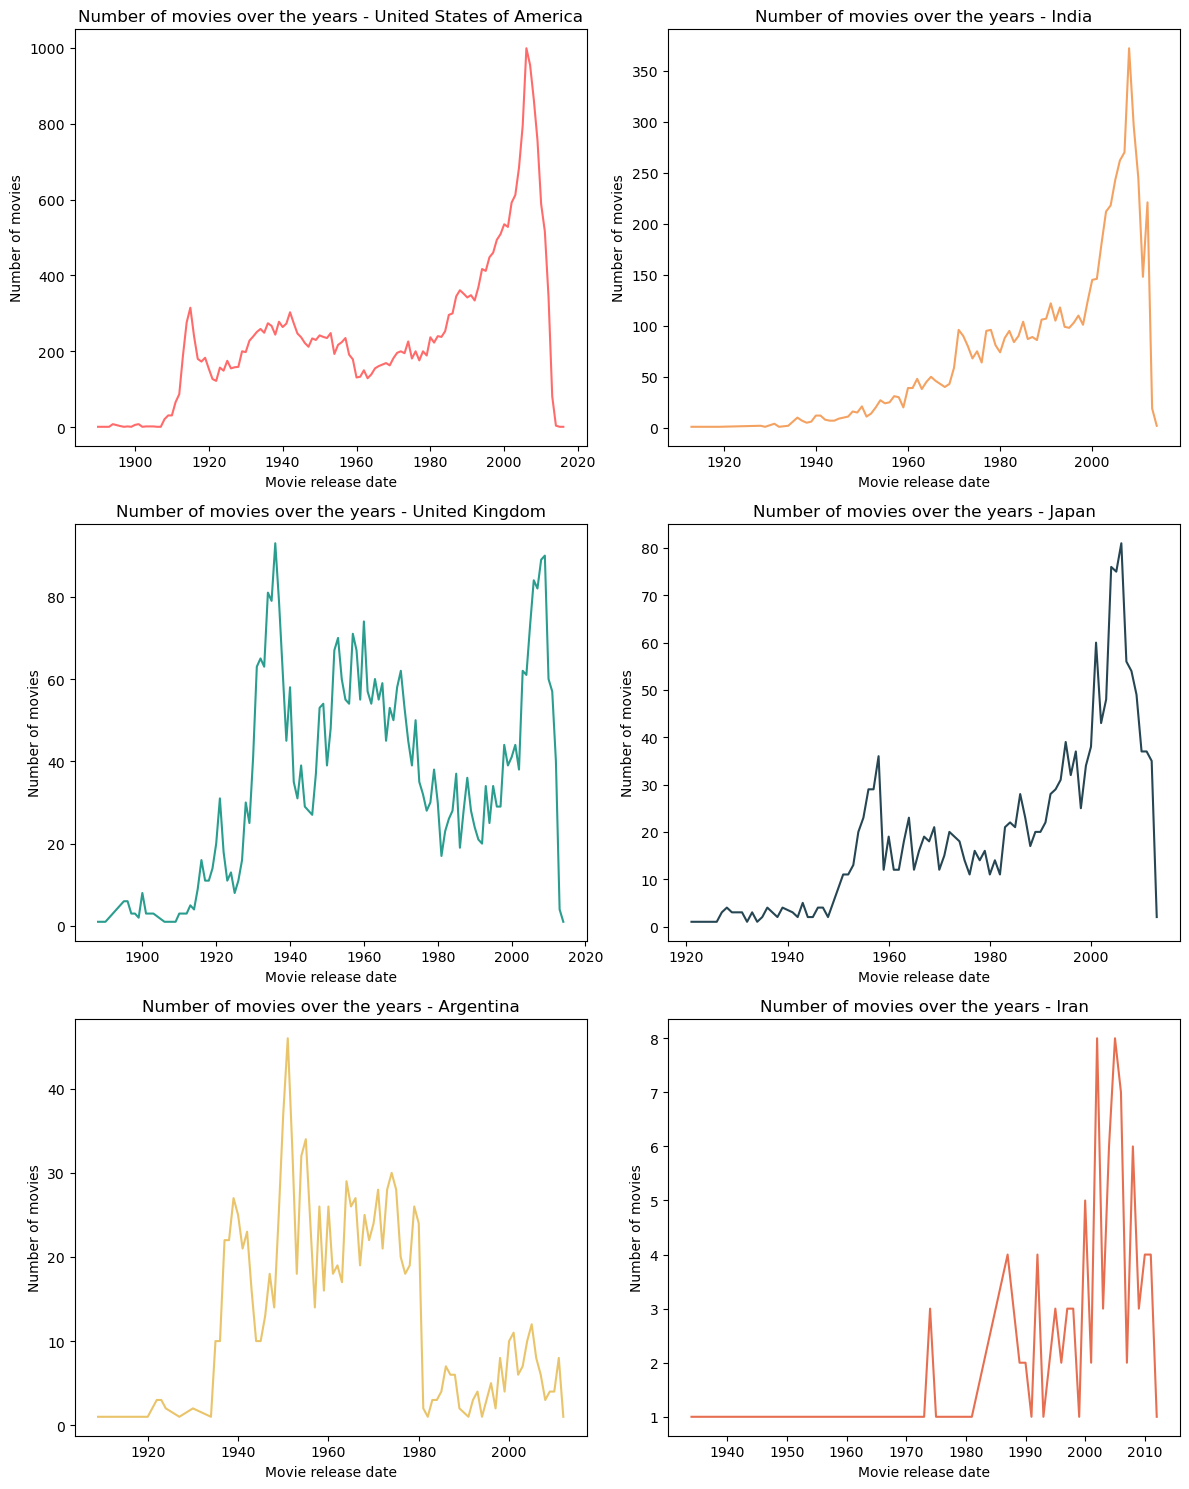

In [21]:
focus_countries = ['United States of America', 'India', 'United Kingdom', 'Japan', 'Argentina', 'Iran']
color_dict = dict(zip(focus_countries, colors))

df_focus = df_date_clean[df_date_clean['Movie country'].isin(focus_countries)]

nb_per_year = df_focus.groupby(['Movie country', 'Movie release date']).count()['Wikipedia movie ID']
nb_per_year = nb_per_year.reset_index()
nb_per_year = nb_per_year.rename(columns={'Wikipedia movie ID': 'Movie count'})

nb_per_year['Movie release date'] = pd.to_datetime(nb_per_year['Movie release date'], errors='coerce')

num_columns = 2
num_rows = 3
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 15))
axes = axes.flatten()


for idx, country in enumerate(focus_countries):
    country_data = nb_per_year[nb_per_year['Movie country'] == country]
    axes[idx].plot(country_data['Movie release date'], country_data['Movie count'], linestyle='-', color=color_dict[country])
    axes[idx].set_title(f"Number of movies over the years - {country}")
    axes[idx].set_xlabel("Movie release date")
    axes[idx].set_ylabel("Number of movies")

plt.tight_layout()
plt.show()

The global trend that we see on the 6 graphs is an increase of the movie production between 1890 and 2007. We can interprate those result and estimate that the advancement of new technologies worldwide are the major cause of this increase.

We can observe a drop in the american movie production around 1915 which coincides with World War I. It did not really affected the UK because their movie production was very low at that time. India, Argentina, Iran and Japan was not involved in World War I. Concerning World War II the observation is a bit different. We notice a huge decrease of number of movie for the UK and Argentina around 1939-1945 and a less important one for the USA. UK and USA were directly involved in the World War II while Argentina had the influence of Germany and Italy. Moreover, the number of movies produced per yer before 1940 for Japan is very low but we can observe that this number increases a lot after World War II. 

Around 2007, we discern a fall of prodcution for the 6 countries. This date corresponds to the appearance of Netflix, a platform that offers a streaming service of movies, series. People can access to huge number of movies very easily without having to go to cinema theatres. 2008 economic crisis could also have an impact on this production of movies.

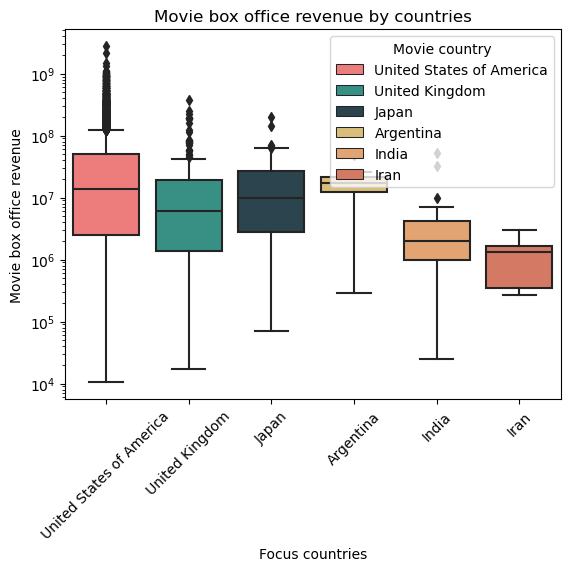

In [22]:
df_revenue_focus = df_date_revenue_clean[df_date_revenue_clean['Movie country'].isin(focus_countries)]

countries_revenues = df_revenue_focus.groupby(['Movie country'])['Movie box office revenue']

#sns.boxplot(x='Movie country', y='Movie box office revenue', hue='Movie country', data=df_revenue_focus, palette=color_dict, dodge=False, legend=False)
sns.boxplot(x='Movie country', y='Movie box office revenue', hue='Movie country', data=df_revenue_focus, palette=color_dict, dodge=False)

plt.yscale('log')
plt.xticks(rotation=45)
plt.xlabel('Focus countries')
plt.ylabel('Movie box office revenue')
plt.title('Movie box office revenue by countries')
plt.show()

India is the second country with the highest number of films produced however the boxplot shows that the movie box office revenue per film is lower than UK, Japan or Argentina even if these countries produce less films. 

USA is still the first country and there are a lot of outliers with a high movie box office revenue. 

Argentina is the 7 country with the highest nb of films produced, after USA, India, UK and Japan. However, we can observe that in mean, it has a highest movie box office revenue per film than these countries. It also has a lower difference between first and third quartile. However it has just one outliers with a abnormaly high movie box office revenue. 

Iran is the country with the lowest number of film produced and also, in average, the lowest movie box office revenue. Nonetheless, it has the lowest gap between whiskers meaning that the distribution of the box office revenue per film is consistent.

# Correlation

In this part, we explore the correlation between GDP and movie industry.

<Axes: xlabel='Movie Count Range', ylabel='Revenue Range'>

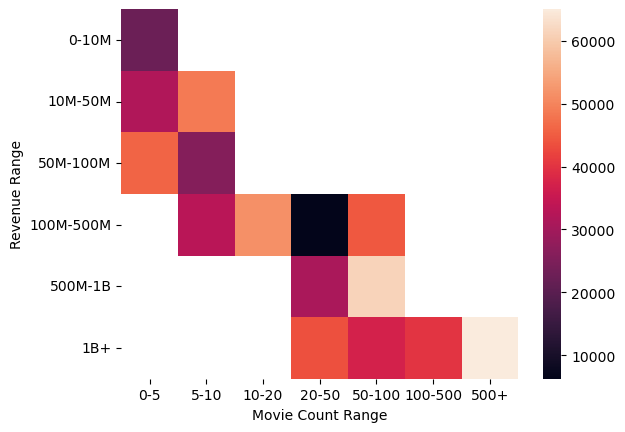

In [23]:
# HEATMAP 

# Preparation of data for the heatmap
nb_per_year = df_date_revenue_clean.groupby(['Movie country', 'Movie release date']).count()['Wikipedia movie ID']
nb_per_year = nb_per_year.reset_index()
nb_per_year = nb_per_year.rename(columns={'Wikipedia movie ID': 'Movie count'})
nb_per_year['Movie release date'] = pd.to_datetime(nb_per_year['Movie release date'], errors='coerce')

total_films_per_country = nb_per_year.groupby('Movie country')['Movie count'].sum().reset_index()
total_films_per_country.columns = ['Movie country', 'Total Movie Count']
df_correlation = pd.merge(df_gdp,total_films_per_country, on='Movie country')

total_revenue_per_country = df_date_revenue_clean.groupby('Movie country')['Movie box office revenue'].sum().reset_index()
total_revenue_per_country.columns = ['Movie country', 'Total Box office revenue']

df_correlation = pd.merge(df_correlation, total_revenue_per_country, on='Movie country')

# Creation of range for the heatmap
df_correlation['Revenue Range'] = pd.cut(df_correlation['Total Box office revenue'], 
                                         bins=[0, 1e7, 5e7, 1e8, 5e8, 1e9, df_correlation['Total Box office revenue'].max()],
                                         labels=['0-10M', '10M-50M', '50M-100M', '100M-500M', '500M-1B', '1B+'])
df_correlation['Movie Count Range'] = pd.cut(df_correlation['Total Movie Count'], 
                                             bins=[0, 5, 10, 20, 50, 100, 500, df_correlation['Total Movie Count'].max()],
                                             labels=['0-5', '5-10', '10-20', '20-50', '50-100', '100-500', '500+'])

df3 = pd.crosstab(
    df_correlation['Revenue Range'],
    df_correlation['Movie Count Range'],
    values=df_correlation['GDP per capita (constant US$)'],
    margins=False,
    aggfunc='mean'
)

sns.heatmap(df3, annot=False)

We can observe that lighter colors, which represent higher GDP, are primarily located towards the bottom right of the heatmap. This indicates that countries with high GDP tend to produce a large number of movies with high box office revenue. In contrast, darker colors, representing lower GDP, are predominantly found towards the top left of the heatmap, suggesting that countries with low GDP produce fewer movies and generate lower box office revenue.

However, we also notice some darker colors around the middle of the heatmap. This suggests that some countries with low GDP are still able to produce a moderate number of movies, and these films tend to achieve relatively good box office performance.

In [24]:
# Cleaning for Pearson correlation 

# Merge with GDP df
df_date_revenue_clean = df_date_revenue_clean.merge(df_gdp[['Movie country', 'GDP per capita (constant US$)']], 
                            on='Movie country', 
                            how='left')

df_date_revenue_clean = df_date_revenue_clean.dropna(subset=['GDP per capita (constant US$)'])

### Pearson correlation

In [25]:
# Between movie box office revenue and GDP
stats.pearsonr(df_date_revenue_clean['Movie box office revenue'],df_date_revenue_clean['GDP per capita (constant US$)'])

PearsonRResult(statistic=0.09948708780010784, pvalue=4.0000430002865707e-19)

There is a small but significant correlation between Movie box office revenue and GDP

In [26]:
# Between number of film produced and GDP
df_countries = countries.to_frame()
df_countries = df_countries.merge(df_gdp[['Movie country', 'GDP per capita (constant US$)']], 
                            on='Movie country', 
                            how='left')
df_countries = df_countries.rename(columns={"Wikipedia movie ID": "Nb of film produced"})

stats.pearsonr(df_countries['Nb of film produced'],df_countries['GDP per capita (constant US$)'])


PearsonRResult(statistic=0.23908261997257524, pvalue=0.3242401222268132)

The correlation between the number of film produced and the GDP is not significant. 

In [27]:
# Linear regression

df_linear_regression = df_date_revenue_clean.copy(True)
# les colonnes qui me casselec ou inutile, à voir si on arrive à en réintroduire si c'est pas trop relou (Movie languages)
df_linear_regression = df_linear_regression.drop(["Freebase movie ID", "Movie languages", "Movie country", "Wikipedia movie ID", "Movie name"], axis=1)
# pour que ce soit en format numérique accepter par le model
df_linear_regression['Movie release date'] = pd.to_datetime(df_linear_regression['Movie release date'], errors='coerce')
# je modifie aussi les genres (y avait trop de multicolinéarité)
# je reprends les focus genre de la partie en dessous
focus_genres = ['Drama', 'Thriller', 'Comedy', 'Romance Film', 'Crime Fiction']
df_linear_regression['Movie genres'] = df_linear_regression['Movie genres'].replace({
    'Romantic comedy': 'Romance Film',
    'Romantic drama': 'Romance Film',
    'Action/Adventure': 'Action',
    'Comedy film': 'Comedy'
})
df_linear_regression['Movie genres'] = df_linear_regression['Movie genres'].apply(
    lambda x: x if x in focus_genres else 'Other'
)

encoded_data = pd.get_dummies(df_linear_regression, columns=["Movie genres"], drop_first=True)

from sklearn.model_selection import train_test_split

X = encoded_data.drop('Movie box office revenue', axis=1)
y = encoded_data['Movie box office revenue']

X['Release year'] = X['Movie release date'].dt.year
X = X.drop('Movie release date', axis=1)
X = X.dropna()
y = y[X.index]  # Alignez y avec X si vous supprimez des lignes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Test set number of sample :', len(y_test))
print('Train set number of sample :',len(y_train))

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

scaler_train = StandardScaler()
scaler_train.fit(X_train)

standardized_X_train = scaler_train.transform(X_train)
standardized_X_test = scaler_train.transform(X_test)

X_train_const = sm.add_constant(standardized_X_train)
X_test_const = sm.add_constant(standardized_X_test)

print("Checking X_train for NaNs or infinities...")
print(np.any(np.isnan(X_train)), np.any(np.isinf(X_train)))

print("Checking y_train for NaNs or infinities...")
print(np.any(np.isnan(y_train)), np.any(np.isinf(y_train)))
model = sm.OLS(y_train,X_train_const)
results = model.fit()
print(results.summary())

Test set number of sample : 1598
Train set number of sample : 6391
Checking X_train for NaNs or infinities...
False False
Checking y_train for NaNs or infinities...
False False
                               OLS Regression Results                               
Dep. Variable:     Movie box office revenue   R-squared:                       0.101
Model:                                  OLS   Adj. R-squared:                  0.100
Method:                       Least Squares   F-statistic:                     89.32
Date:                      Mon, 09 Dec 2024   Prob (F-statistic):          4.63e-141
Time:                              16:15:25   Log-Likelihood:            -1.2711e+05
No. Observations:                      6391   AIC:                         2.542e+05
Df Residuals:                          6382   BIC:                         2.543e+05
Df Model:                                 8                                         
Covariance Type:                  nonrobust               

In [28]:
p_values = results.pvalues

significant_variables = p_values[p_values < 0.05]

print("Variables significatives (p-value < 0.05) :")
print(significant_variables)


Variables significatives (p-value < 0.05) :
const    1.075732e-282
x1        3.972030e-53
x2        2.187545e-35
x5        2.587504e-02
x7        1.760320e-03
x8        5.528966e-62
dtype: float64


Ca veut dire movie runtime, GDP, Genre : Other, Genre : Thriller, Release year

# Movie genres

In this part we will explore the repartition of movie genres in movie industry.

In [29]:
# Focus on 5 main genres
focus_genres = ['Drama','Thriller','Comedy','Romance Film','Crime Fiction']

In [30]:
dfs_countries = []
for country in focus_countries :
    df = df_date_clean[df_date_clean['Movie country'] == country]
    dfs_countries.append(df)

countries_grouped_genre = []

for df in dfs_countries :
    countries_grouped_genre.append(df.groupby(['Movie genres']).count()['Wikipedia movie ID'])

In [31]:
genres_data_by_country = []
for country_genres_nb in countries_grouped_genre :

    country_genres_nb['Romance Film'] = country_genres_nb['Romance Film'] + country_genres_nb.get('Romantic comedy', 0) + country_genres_nb.get('Romantic drama', 0)
    country_genres_nb['Action'] = country_genres_nb['Action'] + country_genres_nb.get('Action/Adventure', 0)
    country_genres_nb['Comedy'] = country_genres_nb['Comedy'] + country_genres_nb.get('Comedy film', 0)

    country_genres_nb = country_genres_nb[focus_genres]

    genres_data_by_country.append(country_genres_nb)

In [32]:
print(genres_data_by_country[0])

Movie genres
Drama            2289
Thriller         3594
Comedy            948
Romance Film     2780
Crime Fiction    2192
Name: Wikipedia movie ID, dtype: int64


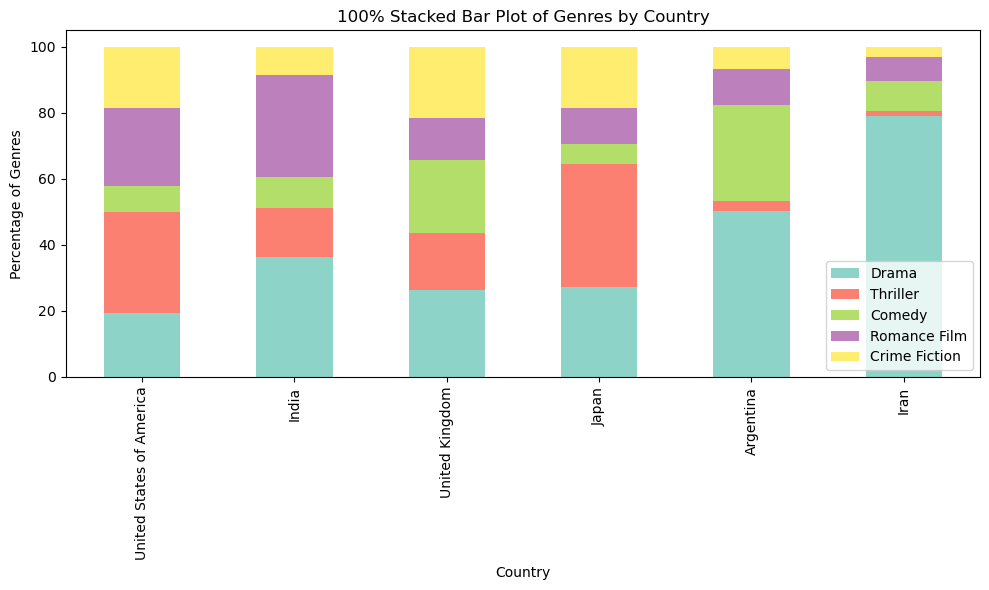

In [33]:
array_tot = []
for i in range(len(focus_countries)):
    v = [focus_countries[i]] + genres_data_by_country[i].values.tolist()
    array_tot.append(v)

df_tot = pd.DataFrame(array_tot, columns=['Countries'] + focus_genres)

df_normalized = df_tot.set_index('Countries')
df_normalized = df_normalized.div(df_normalized.sum(axis=1), axis=0) * 100

ax = df_normalized.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
ax.set_xlabel('Country')
ax.set_ylabel('Percentage of Genres')
ax.set_title('100% Stacked Bar Plot of Genres by Country')

plt.tight_layout()
plt.show()

In [34]:
import plotly.express as px

# Simule tes données ici, remplace par tes données réelles
array_tot = []
for i in range(len(focus_countries)):
    v = [focus_countries[i]] + genres_data_by_country[i].values.tolist()
    array_tot.append(v)

df_tot = pd.DataFrame(array_tot, columns=['Countries'] + focus_genres)

# Normalisation des données pour obtenir des pourcentages
df_normalized = df_tot.set_index('Countries')
df_normalized = df_normalized.div(df_normalized.sum(axis=1), axis=0) * 100
df_normalized.reset_index(inplace=True)

# Conversion des données pour Plotly (format long)
df_melted = df_normalized.melt(id_vars=['Countries'], 
                               var_name='Genre', 
                               value_name='Percentage')

# Création du graphique interactif avec Plotly
fig = px.bar(
    df_melted, 
    x='Countries', 
    y='Percentage', 
    color='Genre', 
    title="100% Stacked Bar Plot of Genres by Country",
    labels={'Percentage': 'Percentage of Genres', 'Countries': 'Country'},
)

# Mise à jour pour afficher uniquement le genre et le pourcentage dans l'infobulle
fig.update_traces(
    textposition='none', 
    hovertemplate=(
        '<b>Percentage:</b> %{y:.2f}%'  # Affiche le pourcentage avec 2 décimales
    ),
    customdata=df_melted[['Genre']],  # Passer le genre spécifique à chaque barre dans customdata
)

# Affichage du graphique
fig.show()


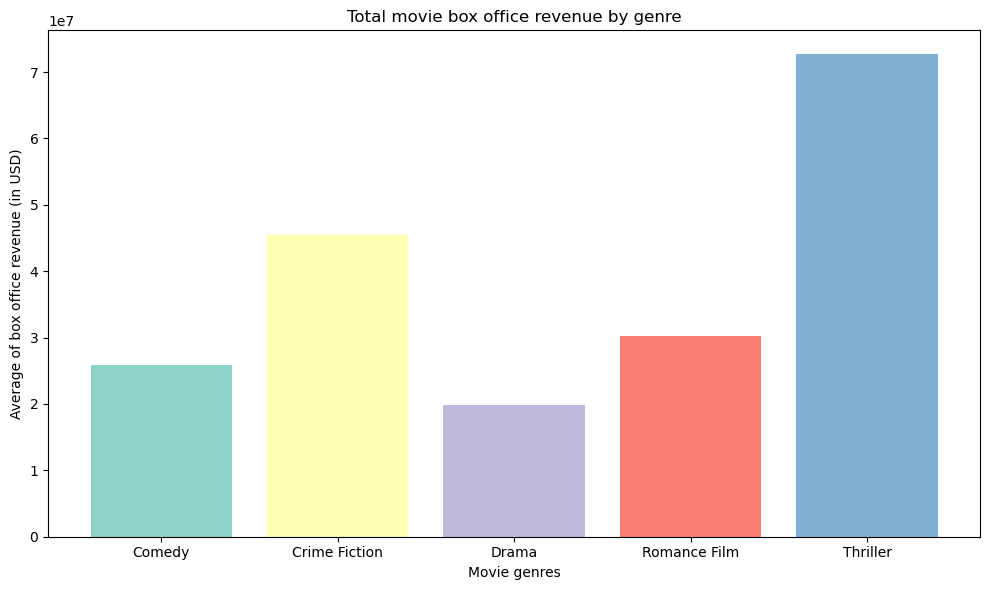

In [35]:
by_genres_stats = df_date_revenue_clean.groupby('Movie genres')['Movie box office revenue'].agg('mean').reset_index()
by_genres_stats.columns = ['Movie genres', 'Average revenue']

filtered_genres_stats = by_genres_stats[by_genres_stats['Movie genres'].isin(focus_genres)]

# Keep the same color as above 
colormap = matplotlib.colormaps['Set3']
colors = [colormap(i) for i in range(len(focus_genres))]

plt.figure(figsize=(10, 6))
plt.bar(filtered_genres_stats['Movie genres'], filtered_genres_stats['Average revenue'], color=colors)
plt.xlabel('Movie genres')
plt.ylabel('Average of box office revenue (in USD)')
plt.title('Total movie box office revenue by genre')
plt.tight_layout()
plt.show()

The genre with the highest average of box office revenue is Thriller. Japan and USA are producing a lot of Thriller movies. However Drama is the genre with the lowest average of box office revenue. Iran and Argentina are producing mainly Drama movies. India produces almost the same amount of Drama and Romance movies but both are not genres with a high average of box office revenue. UK is the only country with a quite proportional repartition between genres with almost the same amount of movies produced for every genre. 

Note : Thriller is the genre with the highest average of box office revenue. But is it because USA produces a lot of Thriller movies ? We know that USA are the country with the highest average of box office revenue so maybe Thriller is the genre with the highest average of box office revenue because it is a genre that USA produces a lot. 

# Actor gender

In this part we analyse the repartition of the gender in movie industry in the 6 countries we are focusing on.

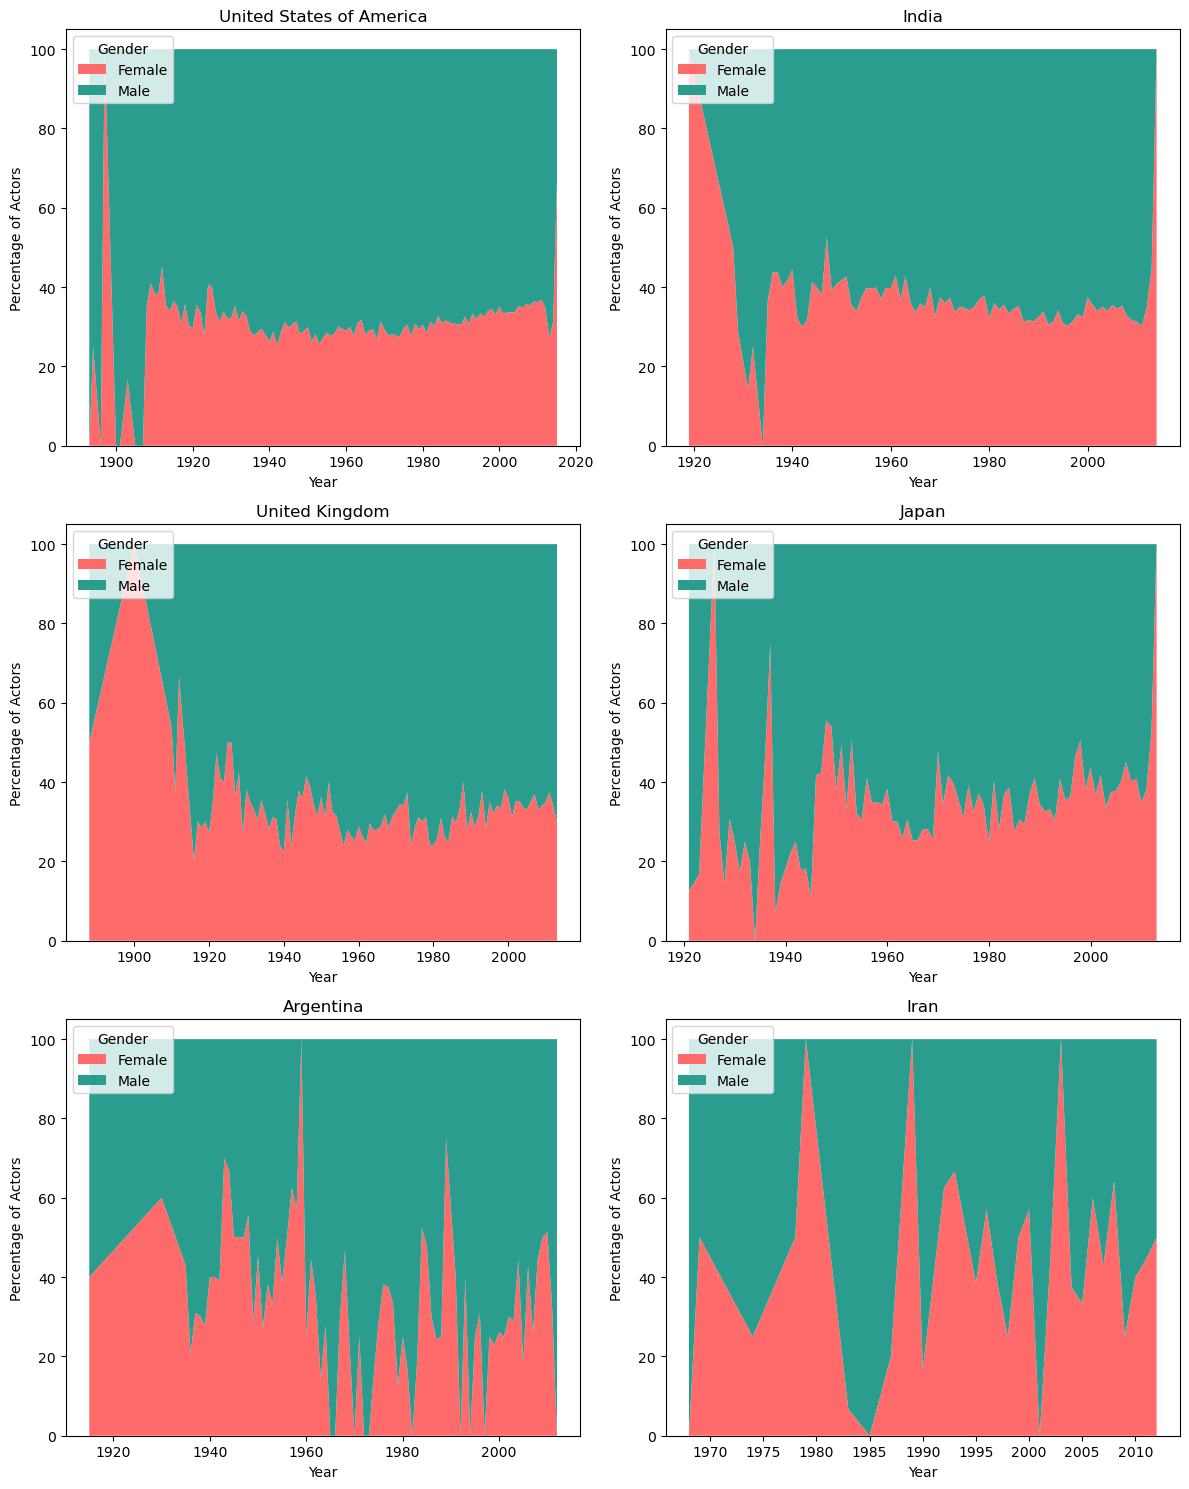

In [36]:
merged_df_focus = merged_df[merged_df['Movie country'].isin(focus_countries)]
actor_counts = merged_df_focus.groupby(['Movie release date', 'Movie country', 'Actor gender']).size().reset_index(name='Count')
total_counts = actor_counts.groupby(['Movie release date', 'Movie country'])['Count'].transform('sum')
actor_counts['Percentage'] = (actor_counts['Count'] / total_counts) * 100

actor_counts['Movie release date'] = pd.to_datetime(actor_counts['Movie release date'], errors='coerce')


num_rows, num_columns = 3, 2
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 15))
axes = axes.flatten()  

for i, country in enumerate(focus_countries):
    ax = axes[i]
    country_data = actor_counts[actor_counts['Movie country'] == country]  # Filter data for the country
    
    # Pivot data for stackplot: years as x, male/female percentages as y
    pivot_data = country_data.pivot(index='Movie release date', columns='Actor gender', values='Percentage').fillna(0)
    years = pivot_data.index
    male_percentage = pivot_data.get('M', 0)
    female_percentage = pivot_data.get('F', 0)
    
    ax.stackplot(years, female_percentage, male_percentage, labels=['Female', 'Male'], colors=["#FF6B6B", "#2A9D8F"])
    
    ax.set_title(f'{country}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage of Actors')
    ax.legend(loc='upper left', title='Gender')

plt.tight_layout()
plt.show()


Concerning the USA, India, the UK and Japan we notice that the gender distribution is in favor of males, with on average 60% of actors and 40% of actresses in the movies throughout the years. Since 1940, the distribution did not really change, we observe a plateau in the curve of those 4 countries, the ratio is staying approximetaly the same. No countries put real efforts in establishing gender euquality in their movie industry. Concerning Argentina and Iran, the results are oscillating a lot, we cannot observe any trend. We think that there are not enough data to draw conclusions.

In [37]:
merged_df_revenue_clean = merged_df.dropna(axis=0)

In [38]:
movie_groups = merged_df_revenue_clean.groupby('Movie name')


movies =[]
box_offices=[]
def male_female_ratio(group):

    box_office = group[1]['Movie box office revenue'].mean()
    male_count = (group[1]['Actor gender'] == 'M').sum()
    female_count = (group[1]['Actor gender'] == 'F').sum()
    ratio = male_count / female_count if female_count > 0 else float('inf')
    return ratio, group[0], box_office

ratios = []
for group in movie_groups:
    ratio = male_female_ratio(group)[0]
    ratios.append(ratio)
    movies.append(male_female_ratio(group)[1])
    box_offices.append(male_female_ratio(group)[2])



ratio_per_movie = pd.DataFrame({
    'Movies': movies,
    'Ratios': ratios,
    'Box offices': box_offices
})



In [39]:
ratio_per_movie = ratio_per_movie[~ratio_per_movie.isin([np.inf, -np.inf]).any(axis=1)]

stats.pearsonr(ratio_per_movie['Ratios'],ratio_per_movie['Box offices'])

PearsonRResult(statistic=0.24849363640474595, pvalue=1.317094203241088e-57)

The Pvalue is really small which means that there is a significant correlation between the success of a movie and the ratio of male/female actors

In [40]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = ratio_per_movie['Ratios'].values.reshape(-1, 1)
y = ratio_per_movie['Box offices']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression().fit(X_poly, y)


optimal_ratio = -model.coef_[1] / (2 * model.coef_[2])
print(f"Optimal Ratio: {optimal_ratio}")



Optimal Ratio: 10.479601496507073


Once we knew that the correlation was significant we tried te find the optimal ratio for success. We performed a linear regression of degree 2, found the value of x corresponding to df/dx = 0. It corresponds to -b/2a. In the case of the curve of box office revenues in terms of ratios the value of x = 10,47.

To maximise the chance to produce a blockbuster, the number of actors should be 10 times higher than the number of actresses.

## Latent Dirichlet Allocation (LDA) for thematic analysis
We are now working with the Stanford CoreNLP-Processed Summaries (628 MB): Plot summaries from the metadata dataset, processed for linguistic analysis (tagging, parsing, named entity recognition, coreference). 
This is a nice way to select only the words that are meaningfull to define a theme with the LDA:
- The common nouns
- The verbs
- The adjectives

Among those words, we did one more selection by choosing manually a list of weak_verbs that we judge not meaningfull to define a theme and therefore, will be ignored in the LDA.
 

In [41]:
weak_verbs = {
    "accept", "achieve", "act", "add", "admit", "affect", "afford", "agree", "aim", "allow", "appear", "apply", "argue",
    "arrange", "arrive", "ask", "assume", "avoid", "be", "become", "begin", "believe", "belong", "bring", "build", "buy", "call",
    "carry", "cause", "change", "choose", "claim", "close", "collect", "come", "commit", "compare", "complete",
    "consider", "consist", "continue", "contribute", "control", "cope", "create", "cut", "deal", "decide", "decline",
    "deliver", "demand", "depend", "describe", "design", "destroy", "determine", "develop", "die", "differ", "discover",
    "discuss", "display", "do", "dominate", "draw", "dress", "drink", "drive", "eat", "encourage", "end", "enjoy",
    "enter", "establish", "examine", "exist", "expect", "experience", "explain", "express", "fail", "fall", "feel",
    "fight", "find", "follow", "form", "function", "gain", "get", "give", "go", "grow", "guess", "handle", "happen",
    "have", "hear", "help", "hide", "hold", "hope", "identify", "imagine", "implement", "improve", "include", "increase",
    "influence", "inform", "initiate", "insist", "intend", "introduce", "involve", "join", "keep", "kill", "know",
    "laugh", "lead", "learn", "leave", "let", "lie", "like", "listen", "live", "look", "lose", "love", "maintain",
    "make" , "manage", "matter", "mean", "measure", "meet", "mention", "mind", "miss", "move", "need", "note", "notice",
    "observe", "obtain", "occur", "offer", "open", "operate", "organize", "own", "participate", "pass", "pay", "perform",
    "plan", "play", "possess", "prefer", "prepare", "present", "prevent", "proceed", "produce", "provide", "pull", "put",
    "raise", "reach", "read", "realize", "receive", "recognize", "record", "reduce", "refer", "reflect", "refuse",
    "regard", "relate", "remain", "remember", "remove", "report", "represent", "require", "resolve", "respond",
    "result", "reveal", "rise", "run", "save", "say", "see", "seem", "select", "sell", "send", "serve", "set", "share",
    "show", "sit", "sleep", "solve", "speak", "spend", "stand", "start", "state", "stay", "stop", "study", "suggest",
    "supply", "support", "suppose", "survive", "take", "talk", "teach", "tell", "tend", "test", "think", "touch",
    "train", "try", "turn", "understand", "use", "vary", "view", "visit", "wait", "walk", "want", "watch", "wear",
    "win", "wish", "work", "write"
}


# function that extracts the meaningful words in each XML file
def parse_corenlp_file(file):
    with gzip.open(file, 'rt', encoding='utf-8') as f:
        tree = ET.parse(f)
        root = tree.getroot()
        filtered_words = []
        for token in root.iter('token'):
            lemma = token.find('lemma').text
            pos = token.find('POS').text
            if pos in {'NN', 'NNS'} or pos.startswith('VB') or pos.startswith('JJ'):
                if lemma.lower() not in weak_verbs:
                    filtered_words.append(lemma)
        return ' '.join(filtered_words)

We are now reading the entire corenlp_plot_summaries.tar zip file, which should be downloaded and placed manually in the folder data as explained in the README.

In [42]:
tar_path = 'data/corenlp_plot_summaries.tar'

documents = []
ids = []

with tarfile.open(tar_path, 'r') as tar:
    for member in tar.getmembers():
        if member.name.endswith('.xml.gz'):
            with tar.extractfile(member) as xml_gz_file:
                film_id = member.name.split('/')[-1].replace('.xml.gz', '')
                ids.append(film_id)
                document = parse_corenlp_file(xml_gz_file)
                documents.append(document)

FileNotFoundError: [Errno 2] No such file or directory: 'data/corenlp_plot_summaries.tar'

In [ ]:
# Vectorization for LDA
vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(documents)

# LDA
lda = LatentDirichletAllocation(n_components=4,random_state=42) # random seed for reproducibility
lda.fit(doc_term_matrix)
doc_topic_dist = lda.transform(doc_term_matrix)

Let’s identify the top 3 themes for each movie along with their respective proportions, and then merge this data with the existing movie information from the previously cleaned dataset:

In [ ]:
top_themes_per_document = []
for i, doc in enumerate(doc_topic_dist):
    top_indices = doc.argsort()[-3:][::-1] # Indices of the top 3 values in the array doc, sorted in descending order. 
    top_proportions = doc[top_indices]

    top_themes_per_document.append({
        "Wikipedia movie ID": ids[i],
        "Theme 1": top_indices[0],
        "Prop Theme 1": top_proportions[0],
        "Theme 2": top_indices[1],
        "Prop Theme 2": top_proportions[1],
        "Theme 3": top_indices[2],
        "Prop Theme 3": top_proportions[2]
    })

df_top_themes = pd.DataFrame(top_themes_per_document)


df_date_clean['Wikipedia movie ID'] = df_date_clean['Wikipedia movie ID'].astype(str)
df_top_themes['Wikipedia movie ID'] = df_top_themes['Wikipedia movie ID'].astype(str)
merged_df = pd.merge(df_date_clean, df_top_themes, on='Wikipedia movie ID', how='inner')
merged_df.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie country,Movie genres,Theme 1,Prop Theme 1,Theme 2,Prop Theme 2,Theme 3,Prop Theme 3
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],United States of America,Thriller,3,0.554963,1,0.440645,0,0.002221
1,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],United Kingdom,Thriller,1,0.635593,0,0.186048,3,0.176834
2,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],Germany,Drama,0,0.739511,1,0.197227,2,0.061117
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,[English Language],South Africa,Family Film,2,0.563673,1,0.308832,3,0.121564
4,6631279,/m/0gffwj,Little city,1997,NaN,93.0,[English Language],United States of America,Romantic comedy,0,0.986124,2,0.004697,1,0.004666


To understand the themes better, we display the top 10 words that best represent each theme and also show the film with the highest proportion for that theme:

In [ ]:
top_terms = []
terms = vectorizer.get_feature_names_out()
for index, topic in enumerate(lda.components_):
    top_terms.append([terms[i] for i in topic.argsort()[-10:]])

max_prop_movies = merged_df.loc[merged_df.groupby('Theme 1')['Prop Theme 1'].idxmax()]
max_prop_movies.head()


for index, row in max_prop_movies.iterrows():
    theme_id = row['Theme 1']
    print(f"Topic {theme_id} with top terms: {top_terms[theme_id]}")
    print(f"Top film for Topic {theme_id}: ID = {row['Wikipedia movie ID']}, Title = {row['Movie name']}\n")

Topic 0 with top terms: ['woman', 'time', 'marry', 'year', 'mother', 'friend', 'family', 'father', 'life', 'film']
Top film for Topic 0: ID = 4588808, Title = Thavamai Thavamirundu

Topic 1 with top terms: ['body', 'car', 'shoot', 'return', 'escape', 'death', 'house', 'murder', 'police', 'man']
Top film for Topic 1: ID = 1328234, Title = Cradle of Fear

Topic 2 with top terms: ['boy', 'family', 'money', 'time', 'home', 'day', 'house', 'other', 'friend', 'father']
Top film for Topic 2: ID = 3926180, Title = Franklin and the Green Knight

Topic 3 with top terms: ['soldier', 'attempt', 'group', 'order', 'force', 'man', 'other', 'ship', 'escape', 'attack']
Top film for Topic 3: ID = 32260, Title = U-571



Finally, we analyze the overall distribution of movie themes by country:

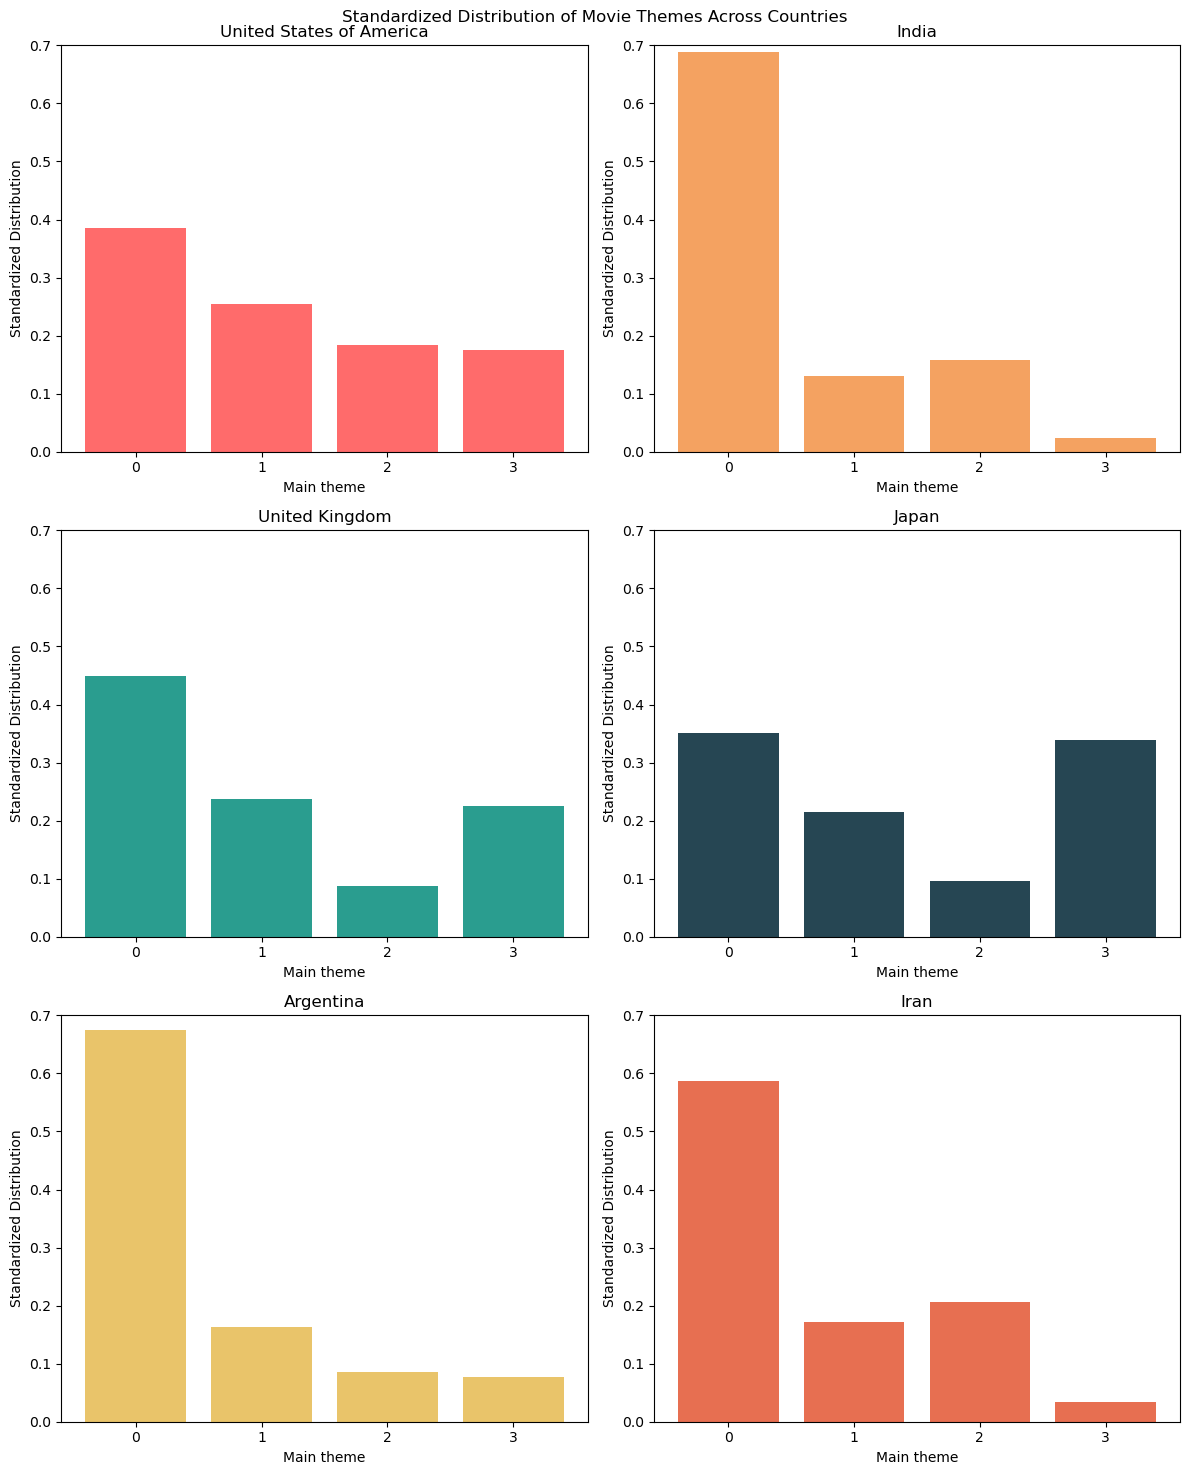

In [ ]:
focus_countries = ['United States of America', 'India', 'United Kingdom', 'Japan', 'Argentina', 'Iran']

num_columns = 2
num_rows = 3
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 15))
fig.suptitle('Standardized Distribution of Movie Themes Across Countries')
axes = axes.flatten()

for idx, country in enumerate(focus_countries):
    # Filter movies by country
    movies = merged_df[merged_df['Movie country'] == country]
    
    # Count the main themes (Thème 1) and standardize the counts
    theme_counts = movies['Theme 1'].value_counts()
    theme_counts_stand = theme_counts / theme_counts.sum()
    
    # Plot as a bar chart
    axes[idx].bar(theme_counts_stand.index, theme_counts_stand.values,color=color_dict[country])
    axes[idx].set_title(f"{country}")
    axes[idx].set_xlabel("Main theme")
    axes[idx].set_ylabel("Standardized Distribution")
    axes[idx].set_xticks(theme_counts_stand.index)  # Ensure theme indices show up correctly on x-axis
    axes[idx].set_xticklabels(theme_counts_stand.index)

for ax in axes:
    ax.set_ylim(0, 0.7)

plt.tight_layout()
plt.show()

Thematic analysis shows a strong preference for family and relationship narratives (Topic 0) across all countries, especially in India and Argentina. The U.S., U.K., and Japan display more diversity, including crime/action themes (Topic 1) and, in Japan’s case, military elements (Topic 3).

This thematic analysis is insightful for understanding overall trends, but we also want to perform a similar comparison focused on specific movie genres. It’s essential to distinguish between a film's genre and its themes, as a single genre can encompass a wide range of themes. By narrowing our analysis to one genre at a time, we aim to explore whether notable thematic differences exist across countries. For instance, within the drama genre, Japanese films might be more likely to explore military themes, whereas American dramas might lean towards themes that combine romance and tragedy. This genre-focused approach will help reveal how cultural contexts shape thematic choices within the same genre.